In [1]:
from pathlib import Path, PureWindowsPath
sys.path.append(PureWindowsPath(r"C:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo\sources").as_posix())
import sys
import os
from lib_general import *

set_current_directory_to_root(root = "classification_texte_bapteme_philo", filetype = "notebook")
print("os.getcwd() at root =", os.getcwd()) 

os.getcwd() at root = C:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo


In [2]:
add_paths(paths = ["/sources/classification/"])

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from pathlib import Path, PureWindowsPath
from lib_classification import *
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [4]:
filename = "data_middle_age_epistemology.parquet"
input_or_output = "input"
class_col_name = "category"
id_col_name = "id"
features_col_names = "message_preprocessed" 
# class_col_name = "category"
class_col_name = "category_bin"

# filename = "data_philosophy_baptism.parquet"
# filename = "data_history_baptism.parquet"
corpus = get_dataset(filename)
corpus = get_balanced_binary_dataset(corpus, class_col_name)
corpus

,id,message,message_preprocessed,category,length,category_bin
0,0,"En conclusion, bien que Van Til lui-même n’ait adopté comme système de pensée intégral ni la philosophie de Kant, ni l’idéalisme, il est difficile de nier une influence idéaliste sur sa pensée. En fait, certains des propos de Van Til pourraient être interprétés comme indiquant une forte influence idéaliste. Si tel est le cas, ce ne serait pas surprenant. Van Til était tellement immergé dans ce contexte philosophique depuis ses années universitaire qu’il semble, au moins, avoir laissé la philosophie des Lumières dicter son programme apologétique. Le fait d’avoir laissé l’idéalisme de ses contemporains éduqués diriger son programme (et une grande partie de son langage philosophique) a entraîné une grande confusion et des désaccords de la part de ses lecteurs. Le fait de permettre à tout « méprisant cultivé » de dicter un ordre du jour théologique peut cependant avoir des conséquences bien pires19.",conclusion bien van til lui-même adopté comme système pensée intégral ni philosophie kant ni idéalisme difficile nier influence idéaliste pensée fait certain propos van til pourraient être interprétés comme indiquant forte influence idéaliste si tel cas surprenant van til tellement immergé contexte philosophique depuis année universitaire semble moins avoir laissé philosophie lumière dicter programme apologétique fait avoir laissé idéalisme contemporains éduqués diriger programme grand partie langage philosophique a entraîné grand confusion désaccord part lecteur fait permettre tout « méprisant cultivé » dicter ordre jour théologique peut cependant avoir conséquence bien pire,middle_age,908,1
1,1,"22. CALVIN, Commentaire sur [Acts 17:24](https://www.esv.org/Acts+17.24), dans _Calvin’s Commentaries_ , Grand Rapids, Mich. : Baker, 1979, XIX/1, p. 157–58.[↩]",calvin commentaire acts httpswwwesvorgacts commentaries grand rapids mich baker xix p –↩,middle_age,162,1
...,...,...,...,...,...,...
712,712,"Notre foi repose sur le Nouveau Testament et l’Ancien Testament seulement, et non sur des révélations orales ( _si elles existent!!_ ) faite aux successeurs des apôtres. Ecriture + Tradition? Hm… non, pas pour Thomas d’Aquin, et tant pis pour Vatican II… Le prochain catholique qui vous dira que les réformateurs ont inventé Sola Scriptura, dites lui que Thomas d’Aquin est un réformateur alors.",foi repose nouveau testament ancien testament seulement non révélation orale si elles existent faite successeur apôtre ecriture tradition hm… non thomas aquin tant pis vatican ii… prochain catholique dira réformateur inventé sola scriptura dites thomas aquin réformateur alors,epistemology,395,0
713,713,"La science acquise : celle qui nous est la plus familière, que nous acquérons par l’abstraction de nos expériences.",science acquise celle plus familier acquérons abstraction expérience,epistemology,115,0


In [5]:
check_duplicates(corpus, id_col_name)

presence de doublons ?
False
False


In [6]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_and_test(corpus, features_col_names, class_col_name, id_col_name)
X_train_tfidf, X_test_tfidf = apply_tfidf_to_train_and_test(X_train, X_test)

In [25]:
print(PureWindowsPath("\\data\\output").as_posix())
print("./" + PureWindowsPath("\\data\\").as_posix() + "/test.txt")
f = open("./" + PureWindowsPath("\\data\\").as_posix() + "/test.txt")
# f = open(PureWindowsPath("\\data\\").as_posix() + "/test.txt")
f.read()

/data/output
.//data/test.txt


'caer'

In [11]:
f = open("./data/test.txt", "w") 
f.write("caer")
f.close()


In [7]:
scorings = ['accuracy', 'f1_macro']
num_iter = 2 #nombre de repetitions de la k-fold cross validation entiere
k = 10 #k de la k-fold cross validation
do_cross_validation(X_train_tfidf, y_train, scorings, num_iter, k)

models = [('LR', LogisticRegression(multi_class='ovr', solver='liblinear')), ('AdaBoostClassifier', AdaBoostClassifier()), ('KNN', KNeighborsClassifier()), ('RandomForest', RandomForestClassifier()), ('SGDClassifier', SGDClassifier()), ('SVM', SVC()), ('DecisionTreeClassifier', DecisionTreeClassifier())]
[('test_accuracy', 0.9278), ('test_f1_macro', 0.9274)] (LR)
[('test_accuracy', 0.932), ('test_f1_macro', 0.9318)] (AdaBoostClassifier)
[('test_accuracy', 0.9361), ('test_f1_macro', 0.9359)] (KNN)
[('test_accuracy', 0.9383), ('test_f1_macro', 0.9381)] (RandomForest)
[('test_accuracy', 0.9444), ('test_f1_macro', 0.9443)] (SGDClassifier)
[('test_accuracy', 0.9215), ('test_f1_macro', 0.9212)] (SVM)
[('test_accuracy', 0.9277), ('test_f1_macro', 0.9276)] (DecisionTreeClassifier)


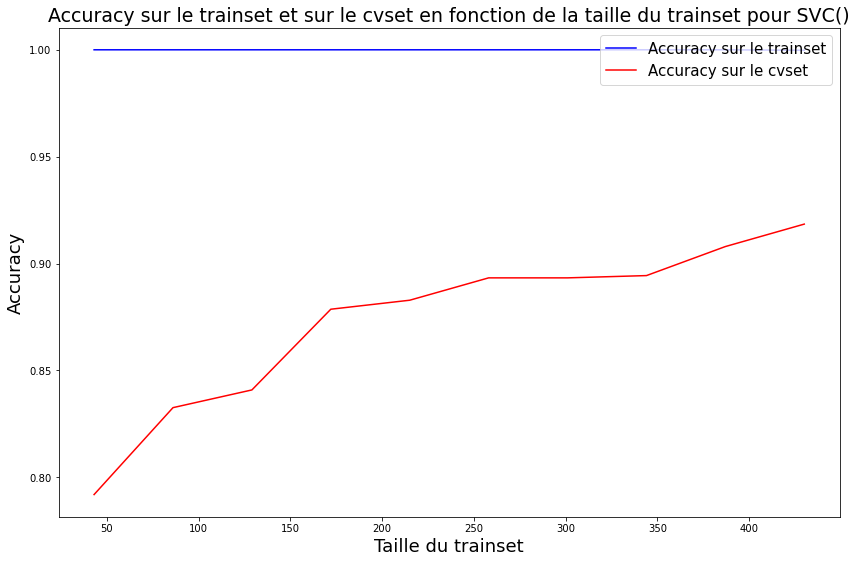

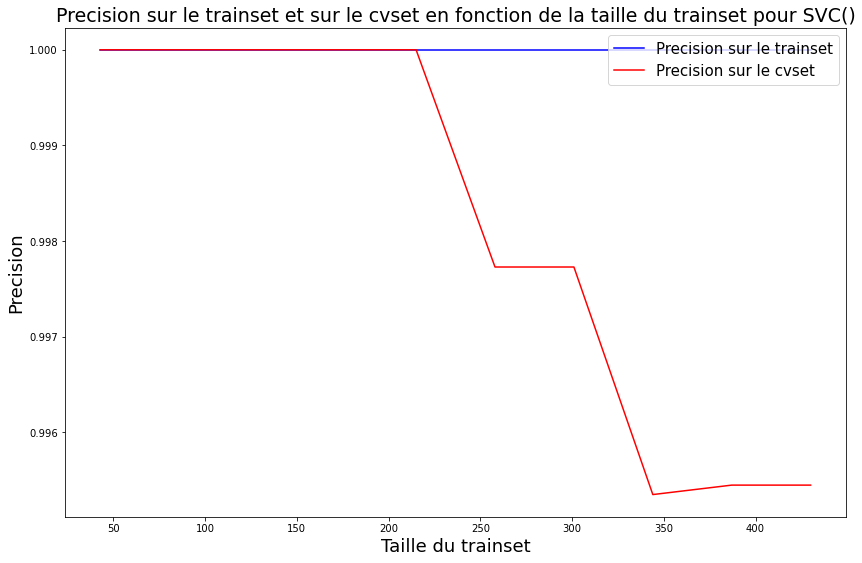

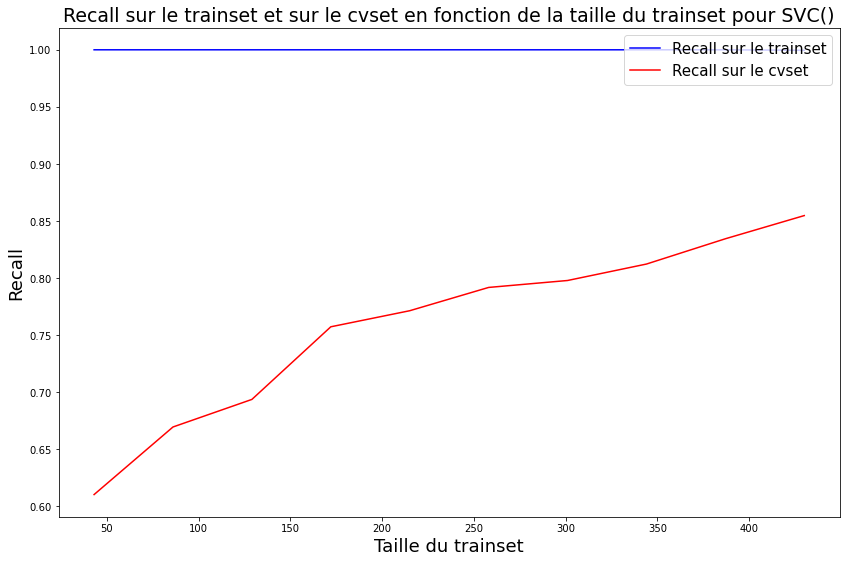

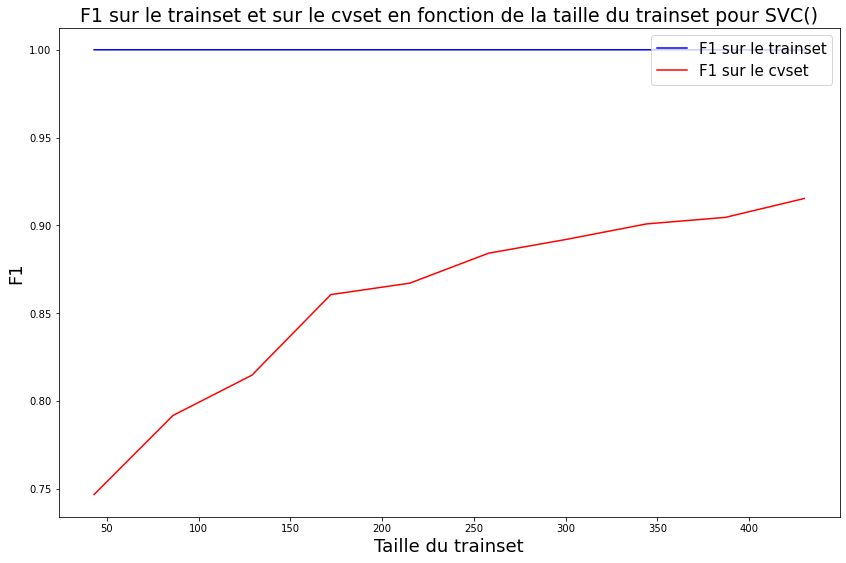

In [8]:
k = 10
# kfold = StratifiedKFold(n_splits=k, random_state=None, shuffle=True) #n_splits = k de la k-fold cv, le nombre de fold
kfold = RepeatedStratifiedKFold(n_splits=k, n_repeats=2, random_state=None)
cv_param = kfold
num_experiences = 10
train_sizes = np.linspace(0.1, 1.0, num_experiences)
# train_sizes = np.linspace(0.001, 1.0, num_experiences)
n_jobs = -1
model = SVC()

scorings = ['accuracy', 'precision', 'recall', 'f1']
for scoring in scorings:
        get_learning_curve(model, X_train_tfidf, y_train, cv_param, scoring, train_sizes, n_jobs=-1, savefig=True)

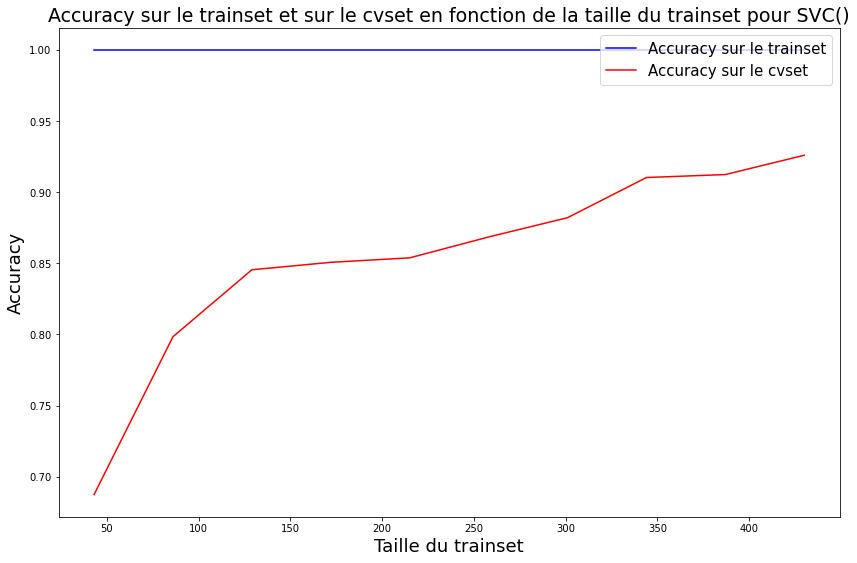

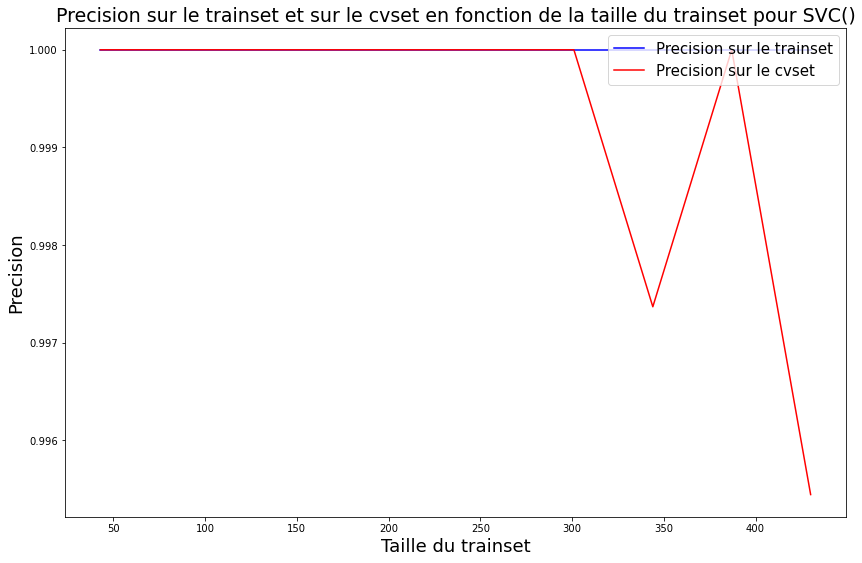

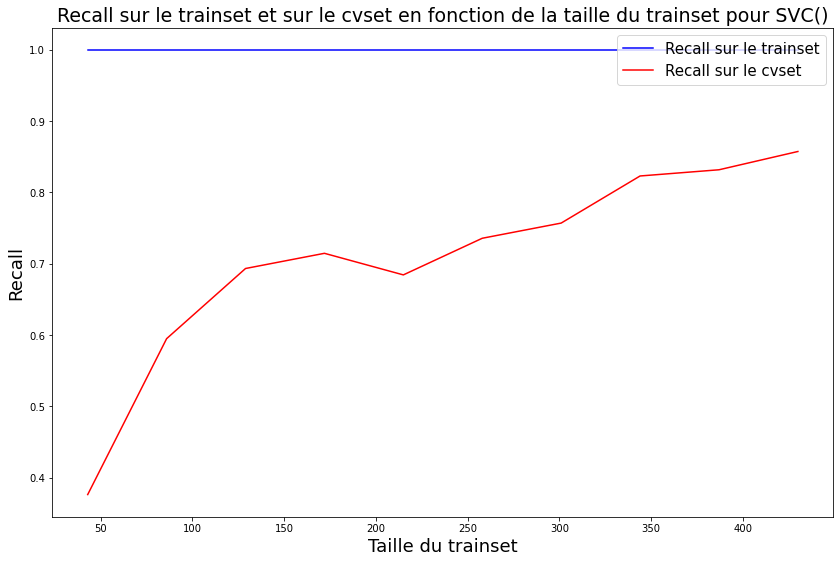

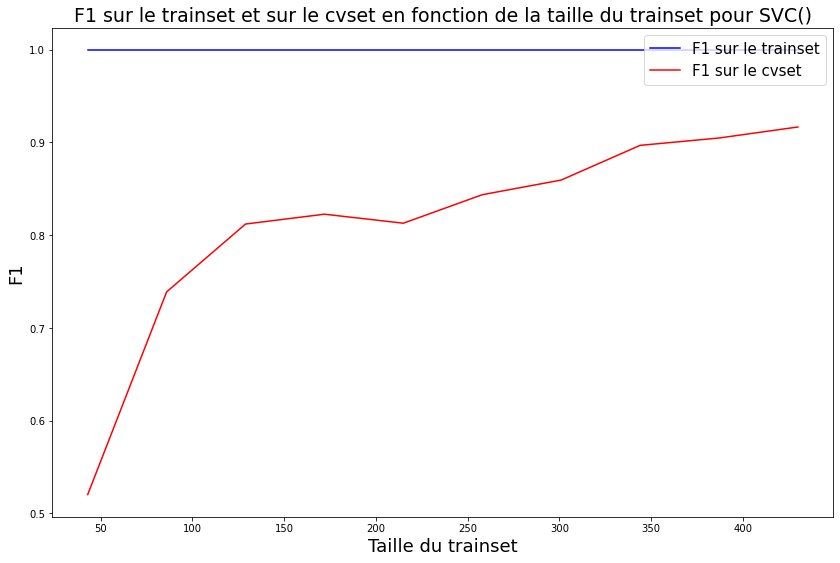

In [16]:
for scoring in scorings:
        get_learning_curve(model, X_train_tfidf, y_train, cv_param, scoring, train_sizes, n_jobs=-1)